In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [28]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

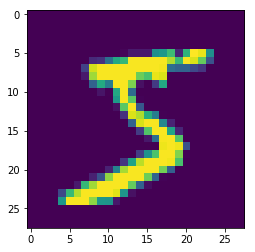

In [29]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [30]:
#check image shape
X_train[0].shape

(28, 28)

In [31]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [32]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [33]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [34]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.5088 - acc: 0.9338 - val_loss: 0.0797 - val_acc: 0.9746
Epoch 2/3
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.0645 - acc: 0.9803 - val_loss: 0.0801 - val_acc: 0.9761
Epoch 3/3
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.0426 - acc: 0.9862 - val_loss: 0.0928 - val_acc: 0.9757


In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [37]:
#show predictions for the first 3 images in the test set
model.predict(X_test[:4])

array([[9.1866745e-09, 4.0903513e-15, 4.1619103e-08, 8.6047141e-05,
        2.2554766e-10, 6.1062566e-10, 3.0276946e-12, 9.9991274e-01,
        3.0925680e-08, 1.1421766e-06],
       [6.1223243e-10, 2.2251702e-11, 1.0000000e+00, 1.3213648e-12,
        4.8940319e-15, 3.0848616e-15, 4.4554942e-09, 1.5654838e-18,
        6.1891654e-14, 5.7391849e-17],
       [1.6798587e-06, 9.9894172e-01, 5.2420699e-05, 4.2613678e-08,
        8.8307912e-05, 1.8777846e-05, 1.6370490e-05, 4.3845142e-07,
        8.8009075e-04, 8.7810960e-08],
       [9.9997926e-01, 1.0569802e-12, 1.1319308e-05, 6.5059513e-11,
        3.2534080e-11, 2.2545041e-10, 8.3041677e-06, 2.0673836e-12,
        1.5884133e-09, 1.1272183e-06]], dtype=float32)

In [38]:
#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)